### Block optimization model

 - In this approach, we solve an optimization problem for each observation time block. 
 - Parameters (as listed in table above) are estimated through a gradient procedure for each block. 
 - Initializations and constraints need to be specified for the model to converge to reasonable solutions

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sourcesep.models.block_opt import Model
rng = np.random.default_rng()

# constants indicating shape of different simulation parameters and constants:
T = 10  # n_samples in time window
I = 3   # n_indicators
L = 20  # n_pixels (wavelengths)
J = 2   # n_laser channels

S = rng.random((I, L))      # replace these with simulated values
E = rng.random((J, L))      # replace these with simulated values
Mu_ox = rng.random((L,))    # replace with known values
Mu_dox = rng.random((L,))   # replace with known values

# observation to fit - this should come from the model itself.
O = torch.tensor(rng.random((T, J, L))).to(torch.float)



/Users/fruity/miniconda3/envs/sourcesep/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = Model(T=T, I=I, L=L, J=J, S=S, E=E, Mu_ox=Mu_ox, Mu_dox=Mu_dox)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

n_steps = 100
loss_list = np.empty(n_steps)
for step in range(n_steps):
    O_pred = model(O)
    loss = torch.mean(torch.square(O_pred - O))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    loss_list[step] = loss.detach().numpy()
    print(f'Step: {step:03d} Loss: {loss_list[step]:0.3f}')

Step: 000 Loss: 2.059
Step: 001 Loss: 2.053
Step: 002 Loss: 2.047
Step: 003 Loss: 2.041
Step: 004 Loss: 2.034
Step: 005 Loss: 2.028
Step: 006 Loss: 2.022
Step: 007 Loss: 2.016
Step: 008 Loss: 2.010
Step: 009 Loss: 2.004
Step: 010 Loss: 1.998
Step: 011 Loss: 1.992
Step: 012 Loss: 1.987
Step: 013 Loss: 1.981
Step: 014 Loss: 1.975
Step: 015 Loss: 1.970
Step: 016 Loss: 1.964
Step: 017 Loss: 1.958
Step: 018 Loss: 1.953
Step: 019 Loss: 1.948
Step: 020 Loss: 1.942
Step: 021 Loss: 1.937
Step: 022 Loss: 1.931
Step: 023 Loss: 1.926
Step: 024 Loss: 1.921
Step: 025 Loss: 1.916
Step: 026 Loss: 1.911
Step: 027 Loss: 1.906
Step: 028 Loss: 1.900
Step: 029 Loss: 1.895
Step: 030 Loss: 1.890
Step: 031 Loss: 1.885
Step: 032 Loss: 1.881
Step: 033 Loss: 1.876
Step: 034 Loss: 1.871
Step: 035 Loss: 1.866
Step: 036 Loss: 1.861
Step: 037 Loss: 1.857
Step: 038 Loss: 1.852
Step: 039 Loss: 1.847
Step: 040 Loss: 1.843
Step: 041 Loss: 1.838
Step: 042 Loss: 1.833
Step: 043 Loss: 1.829
Step: 044 Loss: 1.824
Step: 045 

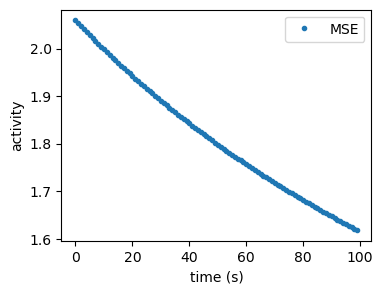

In [3]:
f, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(np.arange(n_steps), loss_list, '.', label='MSE')
ax.set(xlabel='time (s)', ylabel='activity')
plt.legend()
plt.show()